In [1]:
from selenium.webdriver import Firefox
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options

In [2]:
import PIL
from PIL import Image
from pytesseract import image_to_string
import pytesseract
import numpy as np, matplotlib.pyplot as plt, pandas as pd

### Load Firefox and get the Lakport Schedule page

In [3]:
opts = Options()
opts.headless=True
browser = Firefox(options=opts)
browser.get('http://lakport.nic.in/ship_online_programme.aspx')

### Select All Passenger Ships option

In [4]:
#Select All Passenger Ships in drop down selection
ship_selector=Select(browser.find_element_by_id("ContentPlaceHolder1_ship_dlist"))
ship_selector.select_by_visible_text("All Passenger Ships")
ship_selector=Select(browser.find_element_by_id("ContentPlaceHolder1_ship_dlist"))
print(ship_selector.all_selected_options[0].text)

All Passenger Ships


### Defining all required methods to extract and solve captcha

In [5]:
def extract_capcha(browser):
    """Extract the captcha from browser and return
    """
    img=browser.find_element_by_css_selector('img')
    import os, random
    os.makedirs('captcha', exist_ok=True) # Serialize the captchas
    captchas=[int(filename.split('.')[0].split('_')[1]) for filename 
              in os.listdir('captcha') if 'cap' in filename]
    # New name = old name + 1
    if len(captchas)==0: captchas=[-1]
    cap_name = 'captcha/cap_'+ str(max(captchas)+1) +'.png'
    img.screenshot(cap_name)
    return Image.open(cap_name)

def display_captcha(browser):
    plt.imshow(extract_capcha(browser))
    print("OCR Prediction: ", image_to_string(extract_capcha(browser)))
    plt.show()

In [6]:
def solve_captcha(browser):
    """Solve the captcha using teserract and press Enter/Return
    """
    captcha_inp=browser.find_element_by_id('ContentPlaceHolder1_txtimage')
    captcha_inp.clear()
    captcha_inp.send_keys(image_to_string(extract_capcha(browser)))
    captcha_inp.send_keys(Keys.RETURN)

In [7]:
def solve_captcha_again(browser, display=True):
    """Get New Captcha and solve it again
    """
    # Button to refresh the captcha
    refresh_button=browser.find_element_by_id('ContentPlaceHolder1_ImageButton')
    refresh_button.click()
    if display: display_captcha(browser)
    solve_captcha(browser)

In [8]:
def is_captcha_valid(browser):
    """Check if the page contains the required table
    If solve_captcha worked, it will or else need to solve new captcha
    """
    from selenium.common.exceptions import NoSuchElementException
    try: 
        _ = browser.find_element_by_id('ContentPlaceHolder1_progallships_dgrid')
        # Schedule has been found in page without error
        return True
    except NoSuchElementException: return False    

### Keep Solving Captcha until correct

OCR Prediction:  a@E72M7


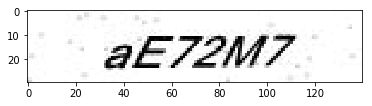

OCR Prediction:  uLx6N6


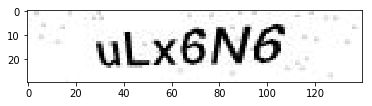

In [9]:
# Try new captchas untill correct prediction ;)
for i in range(100):
    if is_captcha_valid(browser): break #break out of for loop
    solve_captcha_again(browser, display=True)
    from time import sleep
    sleep(1)

### Save the page to html and screenshot the original schedule

In [10]:
browser.find_element_by_id('ContentPlaceHolder1_progallships_dgrid').screenshot('../Images/original_schedule.png')

True

In [11]:
with open('../Lakport_schedule.html', 'w') as f:
    f.write(browser.page_source)

### Showing the read timetable from saved html

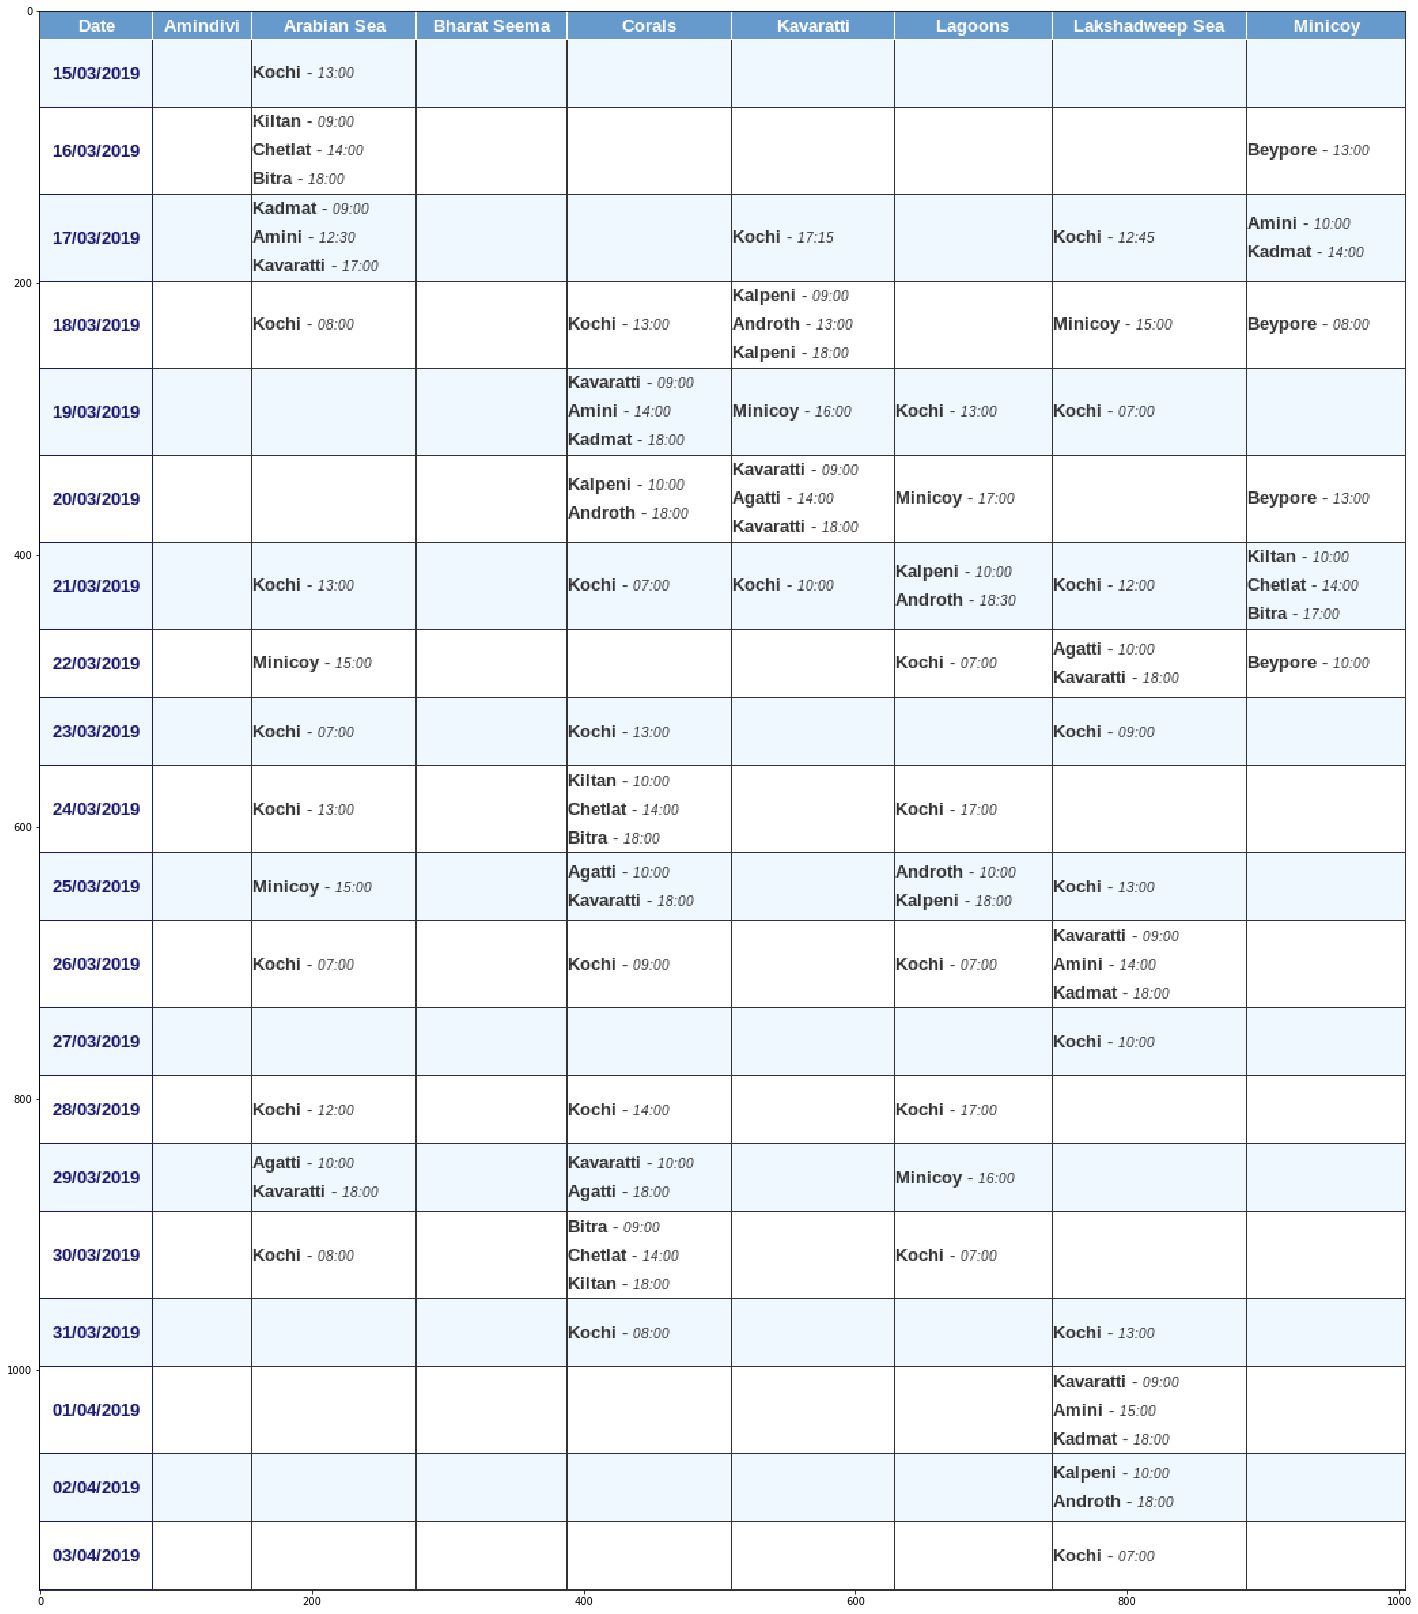

In [12]:
img = Image.open('../Images/original_schedule.png')
f,ax = plt.subplots(1,1, figsize=np.asarray(img.size)/40)
ax=ax.imshow(img)

In [13]:
pd.read_html('../Lakport_schedule.html', header=0)[0]

,Date,Amindivi,Arabian Sea,Bharat Seema,Corals,Kavaratti,Lagoons,Lakshadweep Sea,Minicoy
0,15/03/2019,NaN,Kochi - 13:00,NaN,NaN,NaN,NaN,NaN,NaN
1,16/03/2019,NaN,Kiltan - 09:00Chetlat - 14:00Bitra - 18:00,NaN,NaN,NaN,NaN,NaN,Beypore - 13:00
2,17/03/2019,NaN,Kadmat - 09:00Amini - 12:30Kavaratti - 17:00,NaN,NaN,Kochi - 17:15,NaN,Kochi - 12:45,Amini - 10:00Kadmat - 14:00
3,18/03/2019,NaN,Kochi - 08:00,NaN,Kochi - 13:00,Kalpeni - 09:00Androth - 13:00Kalpeni - 18:00,NaN,Minicoy - 15:00,Beypore - 08:00
4,19/03/2019,NaN,NaN,NaN,Kavaratti - 09:00Amini - 14:00Kadmat - 18:00,Minicoy - 16:00,Kochi - 13:00,Kochi - 07:00,NaN
5,20/03/2019,NaN,NaN,NaN,Kalpeni - 10:00Androth - 18:00,Kavaratti - 09:00Agatti - 14:00Kavaratti - 18:00,Minicoy - 17:00,NaN,Beypore - 13:00
6,21/03/2019,NaN,Kochi - 13:00,NaN,Kochi - 07:00,Kochi - 10:00,Kalpeni - 10:00Androth - 18:30,Kochi - 12:00,Kiltan - 10:00Chetlat - 14:00Bitra - 17:00
7,22/03/2019,NaN,Minicoy - 15:00,NaN,NaN,NaN,Kochi - 07:00,Agatti - 10:00Kavaratti - 18:00,Beypore - 10:00
8,23/03/2019,NaN,Kochi - 07:00,NaN,Kochi - 13:00,NaN,NaN,Kochi - 09:00,NaN
9,24/03/2019,NaN,Kochi - 13:00,NaN,Kiltan - 10:00Chetlat - 14:00Bitra - 18:00,NaN,Kochi - 17:00,NaN,NaN
